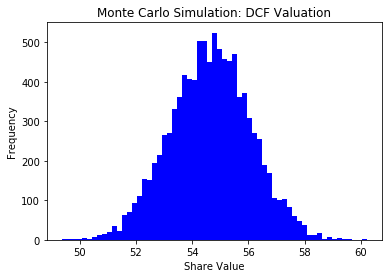

In [14]:
#Take DCF outputs and run them through a Monte Carlo simulation 
#Basically draws a normal distribution around the conclusion 
#Starting point should be discounted, PoS-adjusted free cash flows from the model 

import numpy as np
import pandas as pd 
import math 
import matplotlib.pyplot as plt 
import csv 



x=1
year=2021
year2=year
iterations=10000
years=[year]
FCFList=[]
finalList=[]
df = pd.DataFrame(columns=years)
FCFcounter=0
DiscountCounter=1
DiscountRate=0.2
TerminalGrowth=0.02
TerminalList=[]
sharecount=21.16#8240
FCFList=pd.read_csv('C:/Users/nsw26/Desktop/imuxfcf.csv') 
FCFList = [float(i) for i in FCFList]
FCFList=[i/1000000 for i in FCFList]
#print(FCFList)

#HowMany=int(input("How many years (NOT TOO BIG)?"))

for x in FCFList:
    FCF = np.random.normal(loc=x,scale=4, size=iterations)
    #np.random.normal(loc=mean, scale=standard deviation,size=# of sims to run)
    #FCF=np.around(FCF)
    #DiscountedFCF=FCF/((1+DiscountRate)**DiscountCounter)#discount the FCFs
    #DiscountedFCF=np.around(DiscountedFCF)
    finalList.append(FCF)#append the discounted FCFs
    DiscountCounter+=1
       
for thing in finalList:
    df[year]=thing
    year+=1

#FinalYear=year+HowMany
FinalList = list(df[df.columns[-1]])
#print(FinalList)

for val in FinalList:
    TerminalVal=(val*(1+TerminalGrowth))/(DiscountRate-TerminalGrowth)
    #TerminalVal=round(TerminalVal,1)
    TerminalList.append(TerminalVal)

#print(TerminalList)

df['Terminal']=TerminalList
df["FinalValue"] = df.sum(axis=1)/sharecount #sums columns, divides by share count


#plt.hist(df["sum"],bins=75) 
#plt.show()
#print(df.head())

plt.hist(df["FinalValue"], bins='auto', color='blue')
plt.xlabel('Share Value')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation: DCF Valuation')
plt.show()